## Project Stage - II (Data Modeling)

## Goals

The goal of Stage II is to develop the data for modeling and comparative analysis. Here you will be graphically comparing how different states are doing with respect to opioid mortality rate. And you will be also analysing county based information for different states in the US.


Dataset:

We are going to use historical dataset here for opioid related mortality from 1999 -2019 for different causes of death. Extracted from:
- https://wonder.cdc.gov/wonder/help/ucd.html#Drug/Alcohol%20Induced%20Causes
- File: `./data/1999-2020_Drug_Overdose_By_Category.csv`

### Tasks:

#### Task 1: (100 pts)
- Team: (40)
    - **T1.1** Import the historical data from: `./data/1999-2020_Drug_Overdose_By_Category.xls` (10 pts)
        - Identify peaks in US Opioid Mortality
            - Normalize the mortality by population
            - Calculate mean for states and then mean for US per year
            - Plot a line graph 
                - https://plotly.com/python/line-charts/
        - Discuss why there was a peak
    - **T1.2** Identify trends in states (10 pts)
         - Identify top 5 states which are increasing in their opioid numbers
         - Identify top 5 states which are reducing their opioid numbers
         
    - **T1.3** Plot a graph of the aforementioned states (T1.2) in a line graph (10 pts)
         - Two graphs with 5 lines each representing the states.
    
    - **T1.4** Plot a scatter plot graph of normalized mortality by state with respect to the log of the population.
         - Groupby county
         - Groupby state
         - https://plotly.com/python/line-and-scatter/
         - Color code the dots by the state.

    
- Member: (60 pts)
    - **M1.1** Understand the distribution and measures of center for US opioid mortality for 2019 (20 pts)
         - Import the super dataframe created in Stage I
         - Create a histogram of Normalized Deaths variable for entire US as a distribution. 
             - https://plotly.com/python/histograms/#histograms-with-gohistogram
             - https://plotly.com/python/histograms/
         - Add a vertical line to the histogram representing the ***mean*** Normalized Opioid Death for US. 
             - You should be able to do that with `fig.add_vline()`
             - https://plotly.com/python/horizontal-vertical-shapes/
         - Add another line for ***median*** to compare
    - **M1.2** Understand variable to mortality relationships for 2019 data (40 pts)
        - Here we codify the column Normalized Deaths (Number of Deaths per 100k Population - `Norm_Deaths`) and store it as a `label` column. (10 pts)
            - The codification is based on the quantile distribution of the Normalized deaths. i.e.
                - Very Low (v_low) - [1.999 - 8.0]
                - Low (low) - [8.0 - 11.0]
                - High (high) - [11.0 - 16.0]
                - Very High (v_high) - [16.0 - 64.0]
        - Now try the variables you have identified in Stage I and plot them as a second variable to Normalized Mortality in a scatter plot to observe any trends. (20 pts)
            - For example, if you said population was a indicator, then used population values as the your `y` in scatter plot where `x` is your Normalized Mortality
        - Describe any trends you observe. (10 pts)
        - ***Extra credit (additional 20 pts)***
            - Develop the above approach as a Plotly widget for jupyter, where you can try out the variables dynamically in a simple dashboard. The variables can be in a dropdown. 
            - https://plotly.com/python/figurewidget-app/

**Deliverable**
- Each member creates separate notebooks for member tasks. Upload all notebooks and reports to Github Repository. 
- Discuss the results as a team. Put together a presentation of your findings, record it via zoom, and upload the recording to canvas.

*PS: Try to use `Plotly` for your charts. Will be useful in Stage V. As plotly graphs are intereactive they are not rendered properly in Github. You can use the approach here to render static images: https://plotly.com/python/static-image-export/. Submission to the repository should contain static images in the notebook.*

Importing the required packages

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Image
#from plotly.subplots import make_subplots
from ipywidgets import widgets

Loading the super dataset

In [3]:
op_data = pd.read_csv("../../../../data/stage_1/superdataset_merge.csv")
op_data

,County,County Code,Population,Deaths,Norm_Deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,...,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value,State,FIPS,Opiod_Dispensing_Rate
0,"Abbeville County, SC",45001,535389,38,7.0,45,1,45001,SC,Abbeville County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SC,45001,32.4
1,"Acadia Parish, LA",22001,1279727,237,19.0,22,1,22001,LA,Acadia Parish,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LA,22001,32.2
2,"Accomack County, VA",51001,726189,73,11.0,51,1,51001,VA,Accomack County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VA,51001,19.4
3,"Ada County, ID",16001,8083452,988,12.0,16,1,16001,ID,Ada County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ID,16001,60.8
4,"Adair County, KY",21001,387950,43,11.0,21,1,21001,KY,Adair County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KY,21001,71.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522,"Yuba County, CA",6115,1468094,153,11.0,6,115,6115,CA,Yuba County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA,6115,32.1
2523,"Yukon-Koyukuk Census Area, AK",2290,129587,14,11.0,2,290,2290,AK,Yukon-Koyukuk Census Area,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK,2290,1.2
2524,"Yuma County, AZ",4027,3964172,468,12.0,4,27,4027,AZ,Yuma County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AZ,4027,24.6
2525,"Zapata County, TX",48505,284033,16,6.0,48,505,48505,TX,Zapata County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,48505,3.8


 - Finding the 5 point indexes of the Norm_Deaths
 - This will show us the values of min, max, mean, standard deviation and quartiles 

In [4]:
op_data.Norm_Deaths.describe()

count    2527.000000
mean       12.148002
std         6.768092
min         1.000000
25%         7.000000
50%        11.000000
75%        15.000000
max        63.000000
Name: Norm_Deaths, dtype: float64

In [5]:
op_data.Norm_Deaths.median()

11.0

<b>Static Plot</b>
- The histogram shows the frequency distribtion of Norm_Deaths from the range 1 to 63

<AxesSubplot:>

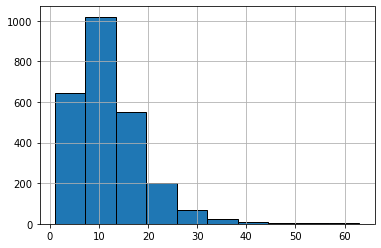

In [6]:
#data.Norm_Deaths.hist(range = (0,63), bins = 10, ec = "black")
op_data.Norm_Deaths.hist(ec = "black")

<b>Dynamic Plot</b>

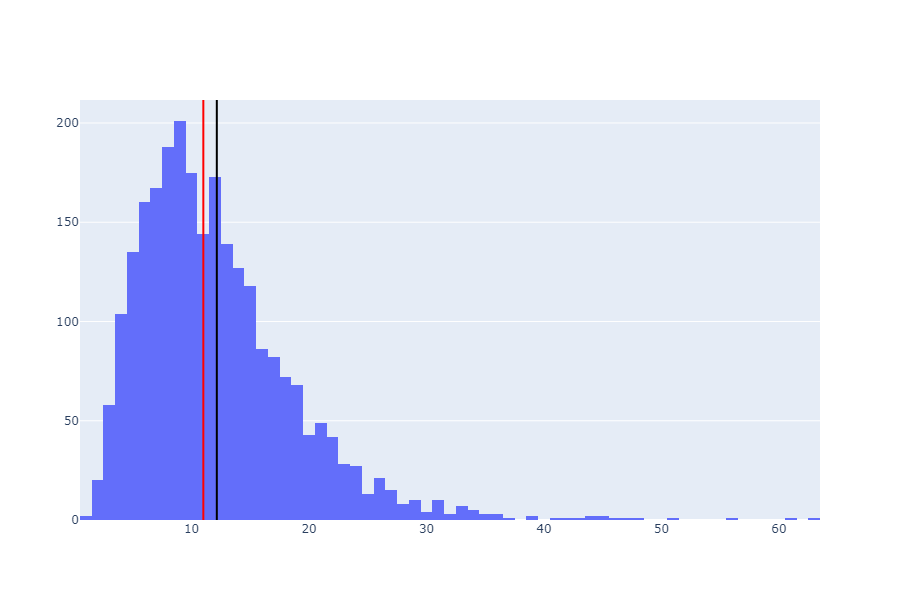

In [8]:
#using go.figure to plot the plotly plots of Norm_Deaths
fig = go.Figure(data=[go.Histogram(x = op_data.Norm_Deaths)])

#Adding vertical lines using add_vline()
fig.add_vline(x=op_data.Norm_Deaths.mean(), line_dash="solid", line_color="black") # black line represents mean line
fig.add_vline(x=op_data.Norm_Deaths.median(), line_dash="solid", line_color="red") # red line represents median line

#fig.show()
fig.write_image("stageII_images/Histogram_plotly.png")
img_bytes = fig.to_image(format="png",width=900, height=600)
Image(img_bytes)

- From the plot we can see that mean is more affected by the values of the skewness of data
- For median we can see that it isn't much affected by the tail and skewness and is more towards the concentrated data values

In [11]:
# if op_data[op_data["Norm_Deaths"]>1.99 & op_data["Norm_Deaths"]<=8]:
#     op_data.assign(label = "v_low")
# elif op_data["Norm_Deaths"]>8 and op_data["Norm_Deaths"]<=11:
#     op_data["label"] = "low"
# elif op_data["Norm_Deaths"]>11 and op_data["Norm_Deaths"]<=16:
#     op_data["label"] = "high"
# elif op_data["Norm_Deaths"]>16 and op_data["Norm_Deaths"]<=64:
#     op_data["label"] = "v_high"

#### To understand the relationship of variable to mortality rate let's codify the Norm_Deaths values as per ranges

In [9]:
# Selecting values from Norm_Deaths that are in the range of (1,8)
# "assign" function add a column to the dataframe and the name will be label and it will give it the value assigned.
a = op_data[op_data.Norm_Deaths.isin(range(1,8))].assign(label = "v_low")
b = op_data[op_data.Norm_Deaths.isin(range(8,11))].assign(label = "low")
c = op_data[op_data.Norm_Deaths.isin(range(11,16))].assign(label = "high")
d = op_data[op_data.Norm_Deaths.isin(range(16,64))].assign(label = "v_high")

pd.concat is used to concat the values of the dataframe

In [10]:
# concat the values of dataframe a,b, c and d to a new dataframe
op_labelled = pd.concat([a,b,c,d])
op_labelled

,County,County Code,Population,Deaths,Norm_Deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,...,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value,State,FIPS,Opiod_Dispensing_Rate,label
0,"Abbeville County, SC",45001,535389,38,7.0,45,1,45001,SC,Abbeville County,...,NaN,NaN,NaN,NaN,NaN,NaN,SC,45001,32.4,v_low
5,"Adair County, MO",29001,530448,30,6.0,29,1,29001,MO,Adair County,...,NaN,NaN,NaN,NaN,NaN,NaN,MO,29001,89.2,v_low
9,"Adams County, IN",18001,721740,45,6.0,18,1,18001,IN,Adams County,...,NaN,NaN,NaN,NaN,NaN,NaN,IN,18001,29.6,v_low
10,"Adams County, MS",28001,682293,43,6.0,28,1,28001,MS,Adams County,...,NaN,NaN,NaN,NaN,NaN,NaN,MS,28001,86.9,v_low
11,"Adams County, NE",31001,655585,22,4.0,31,1,31001,NE,Adams County,...,NaN,NaN,NaN,NaN,NaN,NaN,NE,31001,47.3,v_low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,"Yadkin County, NC",37197,789496,127,16.0,37,197,37197,NC,Yadkin County,...,NaN,NaN,NaN,NaN,NaN,NaN,NC,37197,28.6,v_high
2508,"Yancey County, NC",37199,373081,77,21.0,37,199,37199,NC,Yancey County,...,NaN,NaN,NaN,NaN,NaN,NaN,NC,37199,35.7,v_high
2511,"Yavapai County, AZ",4025,4293644,975,23.0,4,25,4025,AZ,Yavapai County,...,NaN,NaN,NaN,NaN,NaN,NaN,AZ,4025,49.4,v_high
2516,"York County, ME",23031,4152498,693,17.0,23,31,23031,ME,York County,...,NaN,NaN,NaN,NaN,NaN,NaN,ME,23031,32.9,v_high


## Now try the variables you have identified in Stage I and plot them as a second variable to Normalized Mortality in a scatter plot to observe any trends. (20 pts)

#### Below are the variables that I have selected in stage I
* Deaths
* Population
* Opioid Dispensing Rate
* Unemployment raw value
* Infant mortality raw value
* Primary care physicians raw value
* Drug overdose deaths raw value
* Insufficient sleep raw value
* Excessive drinking raw value
* Mental health providers raw value

#### I have referred to the following links to plot the scatter plot
- https://plotly.com/python/line-and-scatter/
- https://plotly.com/python/figure-labels/

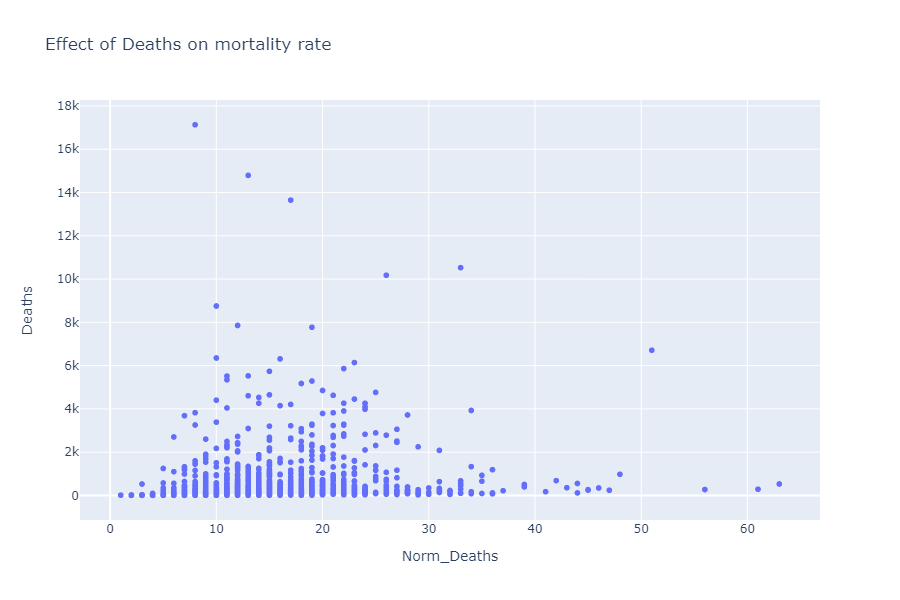

In [11]:
fig = px.scatter(op_labelled, x="Norm_Deaths", y="Deaths", title = "Effect of Deaths on mortality rate")
#fig.show()
fig.write_image("stageII_images/Effect of Deaths on mortality rate.png")
img_bytes = fig.to_image(format="png",width=900, height=600)
Image(img_bytes)

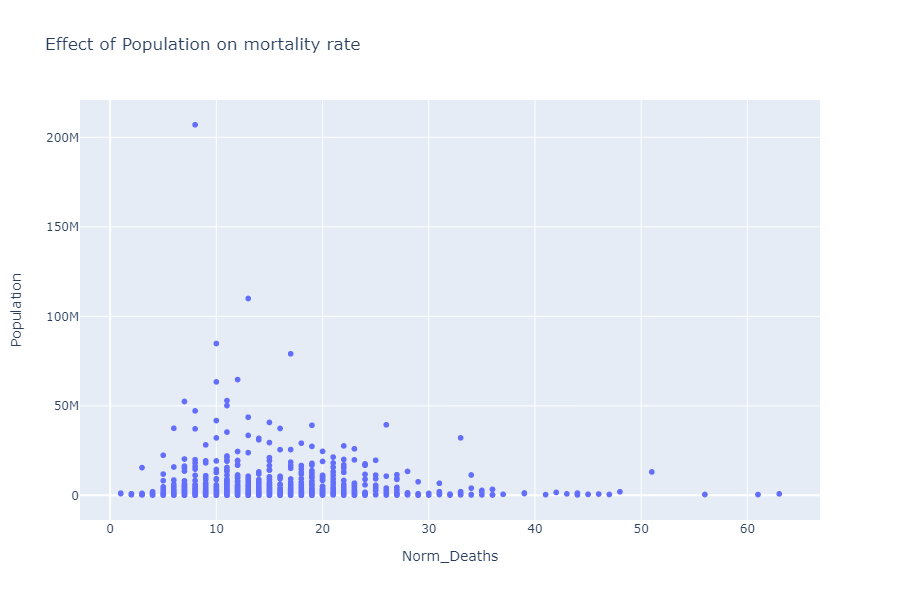

In [13]:
fig = px.scatter(op_labelled, x="Norm_Deaths", y="Population", title = "Effect of Population on mortality rate")
#fig.show()
fig.write_image("stageII_images/Effect of Population on mortality rate.png")
img_bytes = fig.to_image(format="png",width=900, height=600)
Image(img_bytes)

From the graph of Population vs. mortality rate, we can see that most of the deaths are occuring for the value of population between 0 to 25M and the death rate is between 5 to 25. This seems to have a kind of a neutral correlation between them

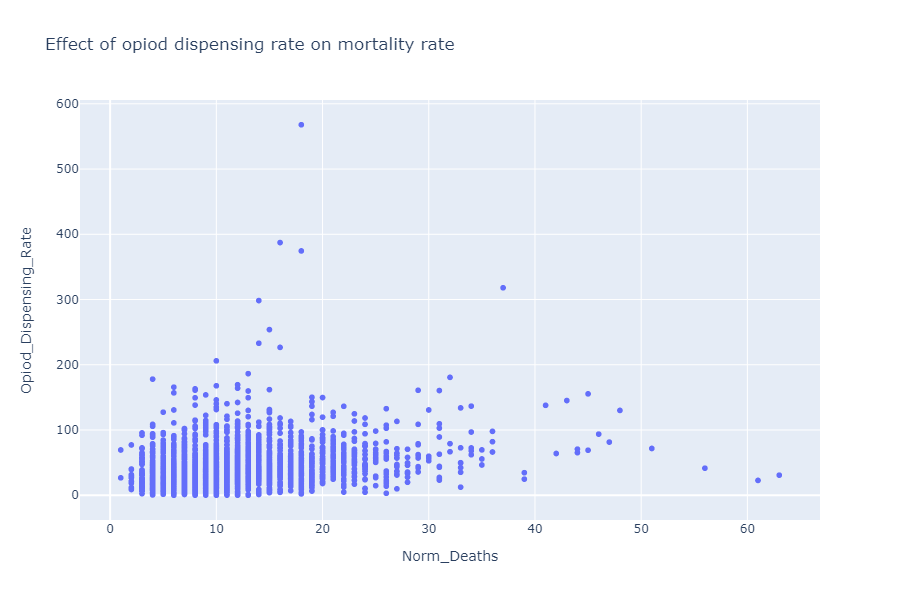

In [14]:
fig = px.scatter(op_labelled, x="Norm_Deaths", y="Opiod_Dispensing_Rate", title = "Effect of opiod dispensing rate on mortality rate")
#fig.show()
fig.write_image("stageII_images/Effect of opiod dispensing rate on mortality rate.png")
img_bytes = fig.to_image(format="png",width=900, height=600)
Image(img_bytes)

From the graph of opioid dispensing rate vs. mortality rate, we can see that most of the deaths are occuring for opioid dispensing rate of 0 to 130 and the death rate is between 1 to 29. They seems to have positive correlation among them.

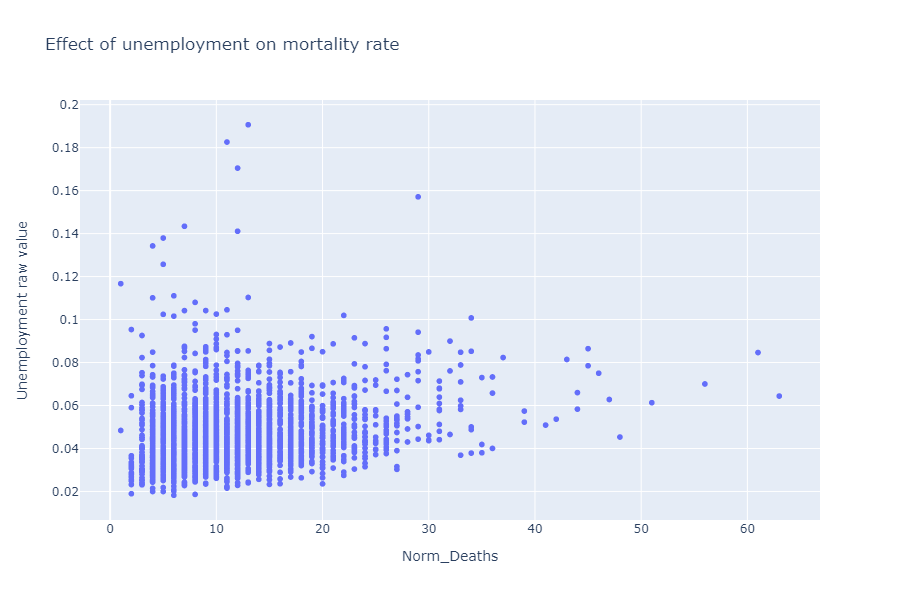

In [15]:
fig = px.scatter(op_labelled, x="Norm_Deaths", y="Unemployment raw value", title = "Effect of unemployment on mortality rate")
#fig.show()
fig.write_image("stageII_images/Effect of unemployment on mortality rate.png")
img_bytes = fig.to_image(format="png",width=900, height=600)
Image(img_bytes)

From the graph of unemployment rate vs. mortality rate, we can see that most of the deaths are occuring for unemployment rate of 0.02 to 0.08 and the death rate is between 3 to 29. They have positive relationship among them

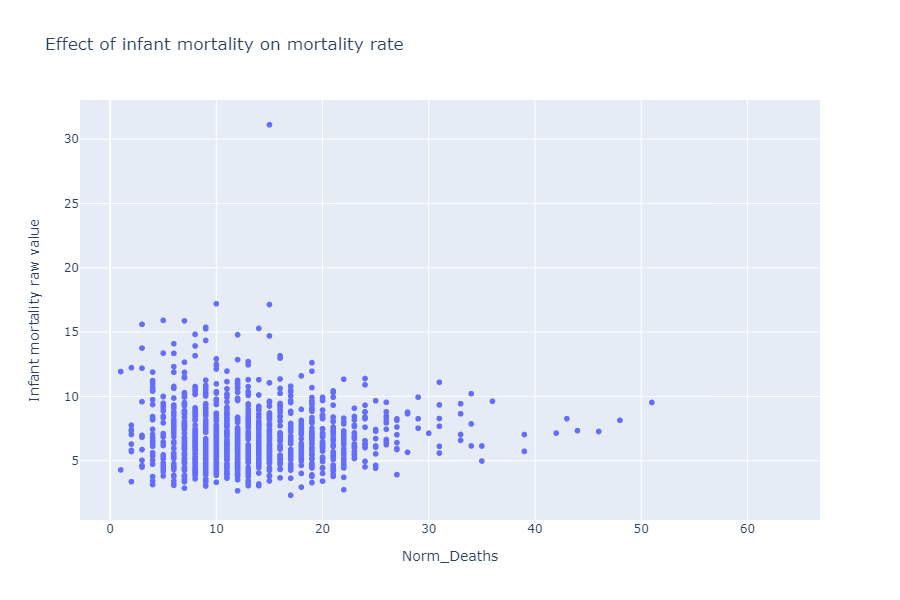

In [16]:
fig = px.scatter(op_labelled, x="Norm_Deaths", y="Infant mortality raw value", title = "Effect of infant mortality on mortality rate")
#fig.show()
fig.write_image("stageII_images/Effect of infant mortality on mortality rate.png")
img_bytes = fig.to_image(format="png",width=900, height=600)
Image(img_bytes)

From the graph of infant mortality rate vs. mortality rate, we can see that most of the deaths are occuring when the infant mortality rate is between 2 to 13 and the death rate is between 4 to 25. These 2 also have kind of neutral realtionship among them

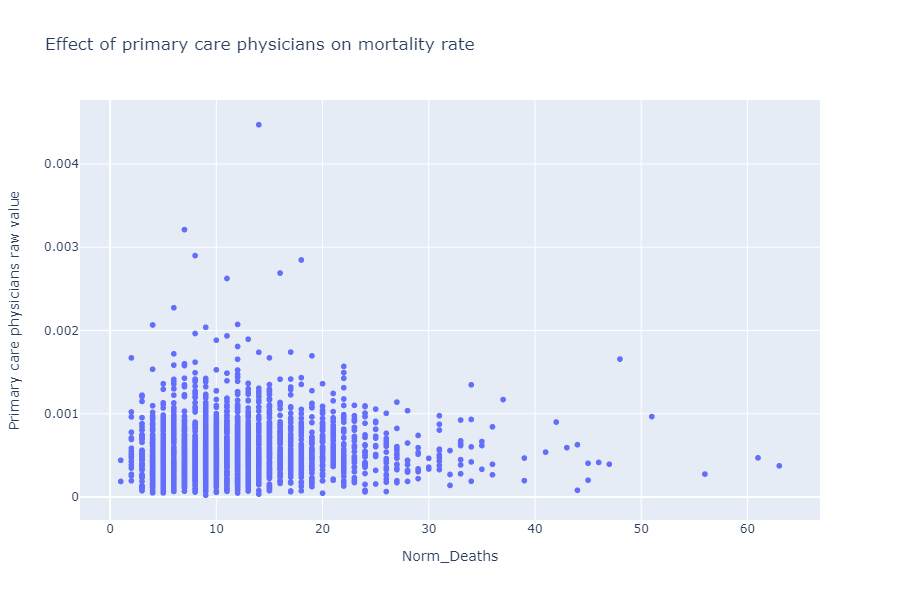

In [17]:
fig = px.scatter(op_labelled, x="Norm_Deaths", y="Primary care physicians raw value", title = "Effect of primary care physicians on mortality rate")
#fig.show()
fig.write_image("stageII_images/Effect of primary care physicians on mortality rate.png")
img_bytes = fig.to_image(format="png",width=900, height=600)
Image(img_bytes)

From the graph of primary physician value vs. mortality rate, we can see that most of the deaths are occuring for primary physician's value of 0 to 0.02 and the death rate is between 3 to 23. These 2 seems to have a neutral relation among them from the graph as it is not increasing or decreasing (no incline or decline)

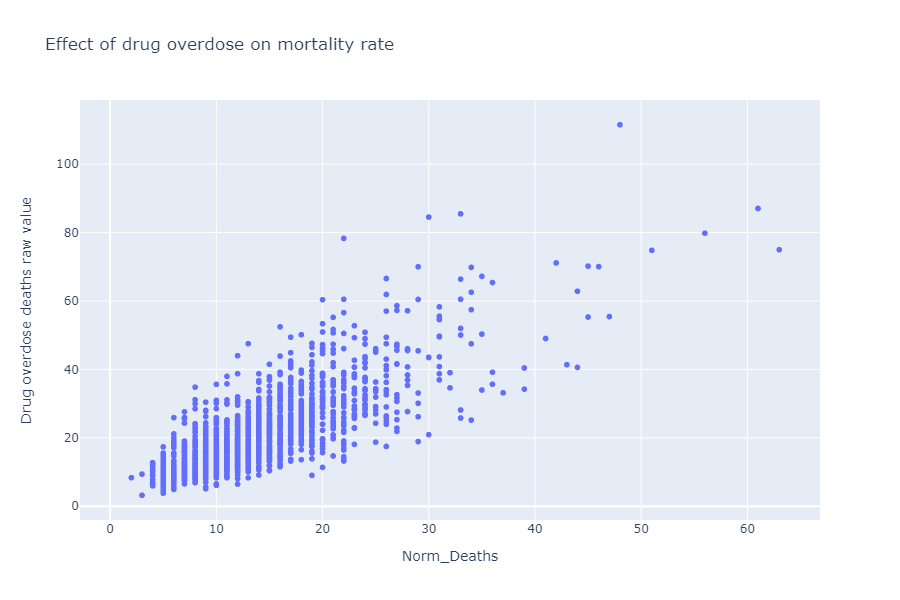

In [18]:
fig = px.scatter(op_labelled, x="Norm_Deaths", y="Drug overdose deaths raw value", title = "Effect of drug overdose on mortality rate")
#fig.show()
fig.write_image("stageII_images/Effect of drug overdose on mortality rate.png")
img_bytes = fig.to_image(format="png",width=900, height=600)
Image(img_bytes)

From the graph of drug overdose vs. mortality rate, we can see a postive correlation between them. And most of the value are clustered when overdose value is between 0 to 50 and the death rate is around 4 to 25. These two seems to have a great positive correlation between them

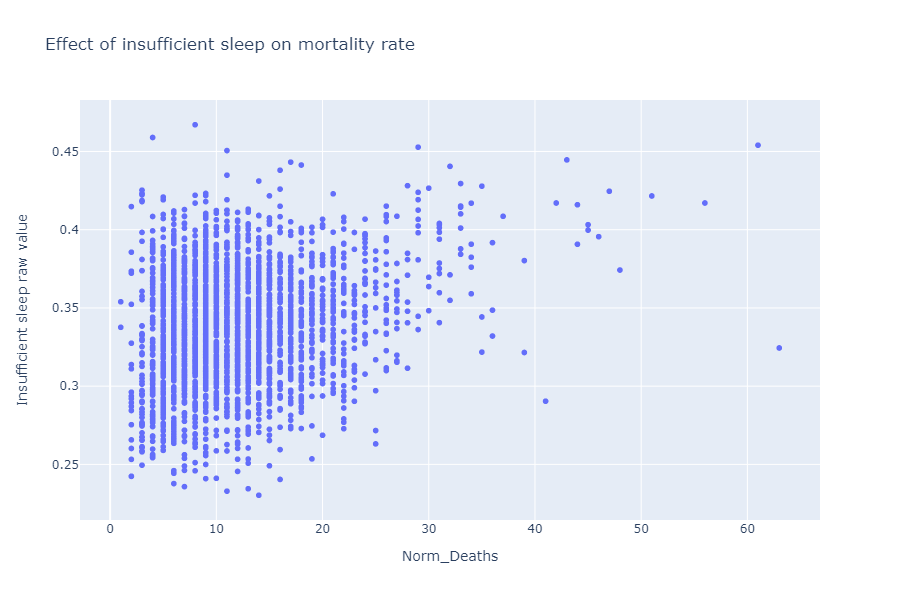

In [19]:
fig = px.scatter(op_labelled, x="Norm_Deaths", y="Insufficient sleep raw value", title = "Effect of insufficient sleep on mortality rate")
#fig.show()
fig.write_image("stageII_images/Effect of insufficient sleep on mortality rate.png")
img_bytes = fig.to_image(format="png",width=900, height=600)
Image(img_bytes)

From the graph of insufficient sleep vs. mortality rate, we can see that most of the deaths are occuring for insufficient sleep value of 0.25 to 0.4 and the death rate is between 5 to 25. This two seems to have positive correlation between them

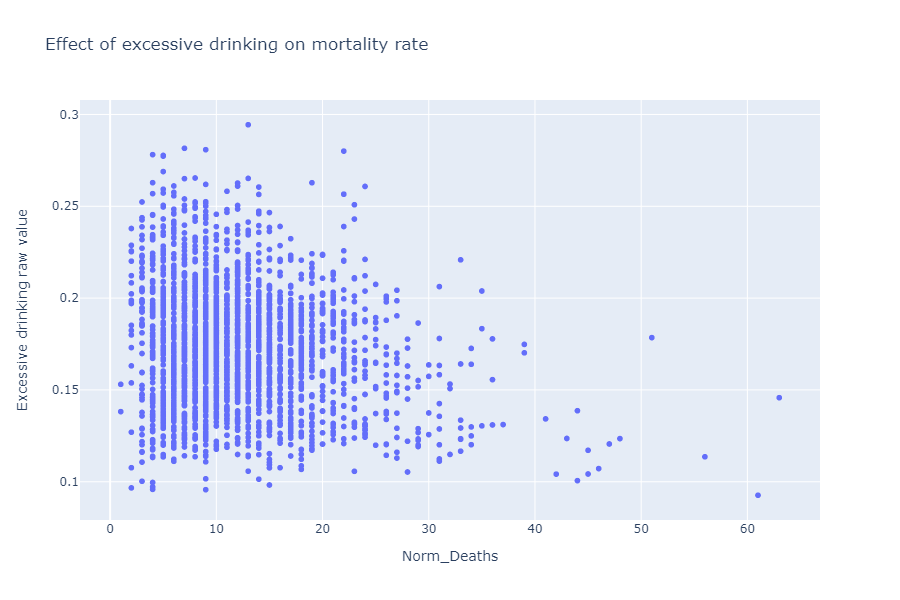

In [20]:
fig = px.scatter(op_labelled, x="Norm_Deaths", y= "Excessive drinking raw value", title = "Effect of excessive drinking on mortality rate")
#fig.show()
fig.write_image("stageII_images/Effect of excessive drinking on mortality rate.png")
img_bytes = fig.to_image(format="png",width=900, height=600)
Image(img_bytes)

From the graph of excessive drinking vs. mortality rate, we can see that most of the deaths are occuring for the value of excessive drinking of 0.15 to 0.25 and the death rate is between 2 to 20. There exists a kind of negative correlation between them



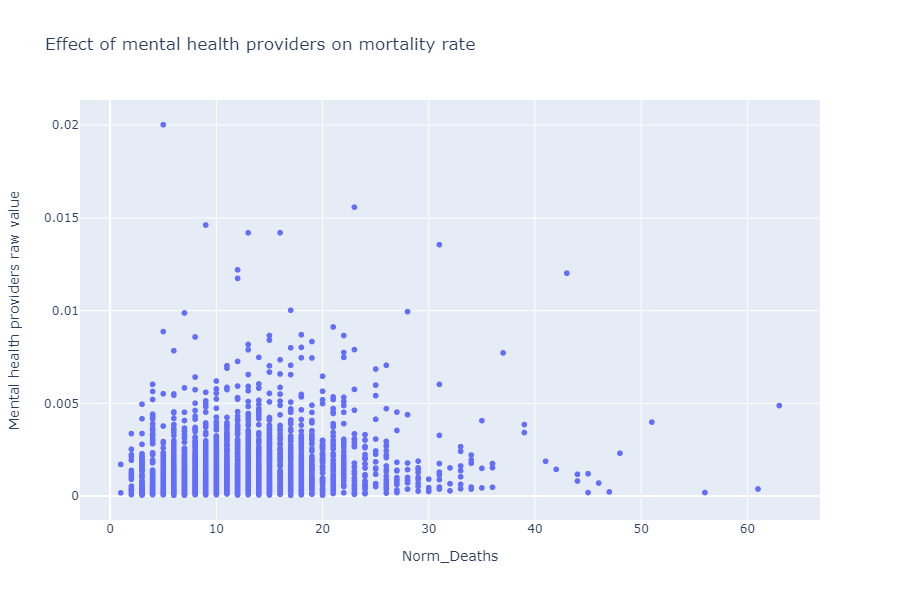

In [21]:
fig = px.scatter(op_labelled, x="Norm_Deaths", y="Mental health providers raw value", title = "Effect of mental health providers on mortality rate")
#fig.show()
fig.write_image("stageII_images/Effect of mental health providers on mortality rate.png")
img_bytes = fig.to_image(format="png",width=900, height=600)
Image(img_bytes)

From the graph of mental health providers vs. mortality rate, we can see that most of the deaths are occuring for the value of mental health providers of 0 to 0.005 and the death rate is between 2 to 27. This seems to have a kind of a neutral correlation between them

#### To sum up we can say that:
- Opioid dispensing rate
- Unemployment
- Drug overdose rate
- Insufficient sleep value
<br></br>
are some of the factors that seem to have relationship with Mortality rate. These are the factors we can have check to have determine the changes in the mortality rate

### Extra credit (additional 20 pts)

I am creating a list of variables to show the plot of in the iPython widgets

In [22]:
variable_list = ['Population','Deaths','Opiod_Dispensing_Rate','Unemployment raw value','Infant mortality raw value','Primary care physicians raw value','Drug overdose deaths raw value','Insufficient sleep raw value','Excessive drinking raw value','Mental health providers raw value']

Creating a dropdown that has the default value as Population on Y-axis

In [23]:
textbox = widgets.Dropdown(
    description='Varible_list: ', # printing this name as the name of the dropbox
    value='Population',           # Setting a default value name
    options=variable_list         # Setting what options will be shown in the dropdown
)

Plotting the scatter plot using plotly graph object. This is the default graph which has population on Y-axis and Norm_Deaths on X-axis.

In [24]:
trace1 = go.Scatter(x=op_labelled["Norm_Deaths"], y=op_labelled["Population"],mode='markers')

Creating a iPython widget which takes the scatter plot as the data and determining the widget layout.

In [25]:
g = go.FigureWidget(data=trace1,           # providing scatter plot as the input data to the widget
                    layout=go.Layout(      # generating a layout
                        title = 'Norm_Deaths vs Population', # providing title
                        xaxis_title = 'Norm_Deaths',         # title x-axis
                        yaxis_title = 'Population'           # title y-axis
                        )
                    )

The following patch of code is used to change the scatter plots. It defines a function which takes a paramater "change" as input and update the ipython_widget parameter values

In [26]:
def response(change):
    with g.batch_update():                        # selects the ipython widget
        g.data[0].y = op_labelled[textbox.value]  # selecting the data[0] of the widget and setting it's y-axis value to the
                                                  # newer value selected from the dropdown
        g.layout.title = "Norm_Deaths vs. "+textbox.value  # changing the title to the value selected in the dropdown
        g.layout.xaxis.title = 'Norm_Deaths'               # setting x-axis label
        g.layout.yaxis.title = textbox.value               # setting y-axis label

.observe() function handles the changes

In [27]:
textbox.observe(response, names="value")

In [28]:
container2 = widgets.HBox([textbox]) #create a special size of box widget
widgets.VBox([container2,            #create a VBox box plot widget which contains the graph and also the dropdown
              g])